In [1]:
import spacy

nlp = spacy.load("pl_core_news_md")

In [2]:
corpus = ["Przetwarzanie tekstu to świetna zabawa", 
          "Lubię pracować z tekstem", 
          "Python świetnie nadaje się do przetwarzania tekstu"]

# Reprezentacja tekstu

## word2vec

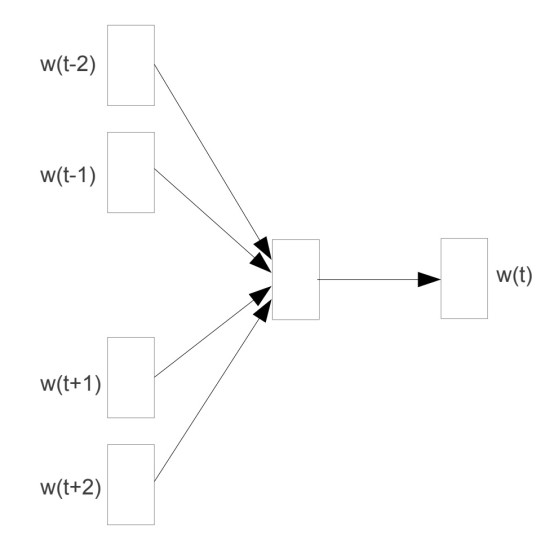

In [6]:
corpus

['Przetwarzanie tekstu to świetna zabawa',
 'Lubię pracować z tekstem',
 'Python świetnie nadaje się do przetwarzania tekstu']

In [7]:
doc_corpus = list(nlp.pipe(corpus, disable=["ner"]))

In [8]:
doc1, doc2, doc3 = doc_corpus

In [9]:
token = doc1[0]
token

Przetwarzanie

In [10]:
token.vector

array([ 1.3984   , -2.249    , -0.40266  , -0.39987  ,  2.0338   ,
       -0.75759  ,  2.9376   ,  0.57497  , -0.77621  , -1.3893   ,
       -0.082324 , -1.1778   , -2.0678   , -0.70138  ,  2.4363   ,
       -0.26349  ,  0.5916   ,  1.008    , -0.61142  , -3.95     ,
        0.57768  , -1.3631   , -1.5796   , -1.5795   , -1.5082   ,
        0.5318   , -1.6288   , -0.86591  , -0.55089  , -0.21735  ,
       -1.8633   , -0.84997  , -1.3925   , -0.93232  ,  0.73009  ,
       -1.0517   , -1.2301   , -0.93539  ,  1.2133   ,  2.089    ,
       -3.3633   ,  0.64183  , -3.0443   ,  2.6519   , -3.4277   ,
        2.3248   , -3.3153   ,  2.0793   ,  0.87482  , -0.19704  ,
       -1.8146   , -1.7645   , -2.8661   , -1.8307   ,  2.2851   ,
        1.3509   , -3.4068   ,  2.8018   ,  1.3253   , -1.7509   ,
       -0.098746 ,  0.533    ,  0.2507   ,  2.4438   ,  0.5736   ,
       -1.3734   , -3.5103   ,  1.9759   , -0.028145 ,  1.3308   ,
        0.73793  ,  0.55352  , -2.0132   , -1.5928   ,  0.4593

In [11]:
token.vector.shape

(300,)

In [12]:
token1 = doc2[0]
token2 = doc2[3]
token3 = doc3[5]

In [13]:
token, token1, token2, token3

(Przetwarzanie, Lubię, tekstem, przetwarzania)

In [14]:
token.similarity(token1)

-0.073096834

In [15]:
token.similarity(token2)

0.13660094

In [16]:
token.similarity(token3)

0.85791975

## Nie tylko spaCy

http://dsmodels.nlp.ipipan.waw.pl/

```
wget http://dsmodels.nlp.ipipan.waw.pl/dsmodels/nkjp+wiki-forms-all-100-cbow-hs.txt.gz
gunzip nkjp+wiki-forms-all-100-cbow-hs.txt.gz
pip install gensim
```

In [3]:
from gensim.models import KeyedVectors

In [4]:
wv = KeyedVectors.load_word2vec_format("nkjp+wiki-forms-all-100-cbow-hs.txt")

In [17]:
kot = wv["kot"]

In [18]:
kot

array([-0.102589,  0.178043, -0.057084, -0.457113, -0.306247, -0.2119  ,
       -0.425097, -1.569989, -1.889534, -0.106873, -0.229686,  2.087142,
        0.084238,  1.10567 ,  0.184873,  1.169008, -1.023242,  0.061859,
       -0.430223, -0.217004, -2.129667, -0.485179, -0.083486, -0.35136 ,
        0.768646, -0.19539 , -1.352238,  1.202864, -0.721479, -0.616718,
        0.998314,  1.389654, -0.882441, -0.119604, -0.938884, -0.35908 ,
       -0.991646,  1.048982,  1.234477,  0.404313,  0.691144,  1.248702,
        0.319536,  0.565905,  1.4284  , -0.673381, -0.619884, -0.224154,
       -1.024156, -1.017372, -1.765402, -1.519865, -0.36516 ,  0.684019,
       -2.253845,  2.167149, -0.170171, -0.678755, -1.153415, -0.005261,
       -0.811185,  1.171225, -1.772228, -0.915149,  1.598141,  0.963447,
        0.633752,  0.546899, -0.66164 ,  0.026965, -0.470698,  0.343448,
       -0.013315, -0.132071, -0.353635,  2.147202,  3.010994, -0.348942,
       -2.247783,  0.559082, -0.035305, -0.015236, 

In [19]:
kot.shape

(100,)

In [20]:
wv.most_similar("kot")

[('piesek', 0.8526582717895508),
 ('koń', 0.8461324572563171),
 ('słoń', 0.8350520133972168),
 ('pies', 0.8342385292053223),
 ('szczur', 0.8289715051651001),
 ('kanarek', 0.8082311153411865),
 ('ptak', 0.8067246675491333),
 ('smok', 0.8053357601165771),
 ('ptaszek', 0.7993157505989075),
 ('królik', 0.7971441149711609)]

In [21]:
wv.most_similar("mały")

[('malutki', 0.8413081169128418),
 ('maleńki', 0.838314950466156),
 ('nieduży', 0.8157733082771301),
 ('duży', 0.8096239566802979),
 ('piękny', 0.7848362922668457),
 ('niewielki', 0.7813587188720703),
 ('stary', 0.7720299959182739),
 ('skromny', 0.7661746740341187),
 ('gruby', 0.766140341758728),
 ('ładny', 0.7616351246833801)]

król = królowa - kobieta + mężczyzna

In [22]:
wv.most_similar(["królowa", "mężczyzna"], ["kobieta"])

[('król', 0.7474443912506104),
 ('książę', 0.7397347092628479),
 ('królewicz', 0.7068279981613159),
 ('władca', 0.6989611387252808),
 ('monarcha', 0.6789560317993164),
 ('rycerz', 0.6668169498443604),
 ('kamerdyner', 0.6543853282928467),
 ('inkwizytor', 0.6532368063926697),
 ('cesarz', 0.6445325613021851),
 ('wezyr', 0.6369556188583374)]

In [23]:
wv["lajkować"]

KeyError: "word 'lajkować' not in vocabulary"